<a href="https://colab.research.google.com/github/Feru34/Deep_Learning/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 1.5 MB/s eta 0:00:00


In [3]:
!pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9d4d49bc0d6f5049916c21cdc2228db2a075b1a09ad672700164275db9df69e8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [4]:
import pandas as pd
import numpy as np

import os
import os.path as osp

import matplotlib.pyplot as plt
%matplotlib inline

import num2words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
import keras_tuner as kt

import contractions
import unicodedata, re

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, TextVectorization, Embedding
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer


import os
import cv2

import seaborn as sns

from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
%matplotlib inline

print('Tensorflow version:', tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tensorflow version: 2.17.0


In [5]:
!ls -lha kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ls: cannot access 'kaggle.json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download marquis03/cats-and-dogs

Dataset URL: https://www.kaggle.com/datasets/marquis03/cats-and-dogs
License(s): apache-2.0
 92% 9.00M/9.75M [00:00<00:00, 93.8MB/s]
100% 9.75M/9.75M [00:00<00:00, 99.4MB/s]


In [2]:
# Descarga el dataset de Kaggle
!pip install kaggle
!mkdir ~/.kaggle
# Sube el archivo kaggle.json y copia en el directorio correcto
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de Kaggle
!kaggle datasets download marquis03/cats-and-dogs
!unzip cats-and-dogs.zip -d /content/dataset/


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/marquis03/cats-and-dogs
License(s): apache-2.0
 51% 5.00M/9.75M [00:00<00:00, 44.6MB/s]
100% 9.75M/9.75M [00:00<00:00, 77.4MB/s]
Archive:  cats-and-dogs.zip
  inflating: /content/dataset/train.csv  
  inflating: /content/dataset/train/cat/Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg  
  inflating: /content/dataset/train/cat/Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg  
  inflating: /content/dataset/train/cat/Abyssinian_149_jpg.rf.b6b4a72a93f8bc2b239b18c5d181190c.jpg  
  inflating: /content/dataset/train/cat/Abyssinian_15_jpg.rf.7bc44eeb9865e35cb1d5f9ef4f53b381.jpg  
  inflating: /content/dataset/train/cat/Abyssinian_167_jpg.rf.1d367cb1cf82c1e5ebda79fda928cee5.jpg  
  inflating: /content/dataset/train/cat/Bengal_103_jpg.rf.bb684501a53abf381a6bf07f9cd2243c.jpg  
  inflating: /content/

Found 275 files belonging to 2 classes.
Using 220 files for training.
Found 275 files belonging to 2 classes.
Using 55 files for validation.


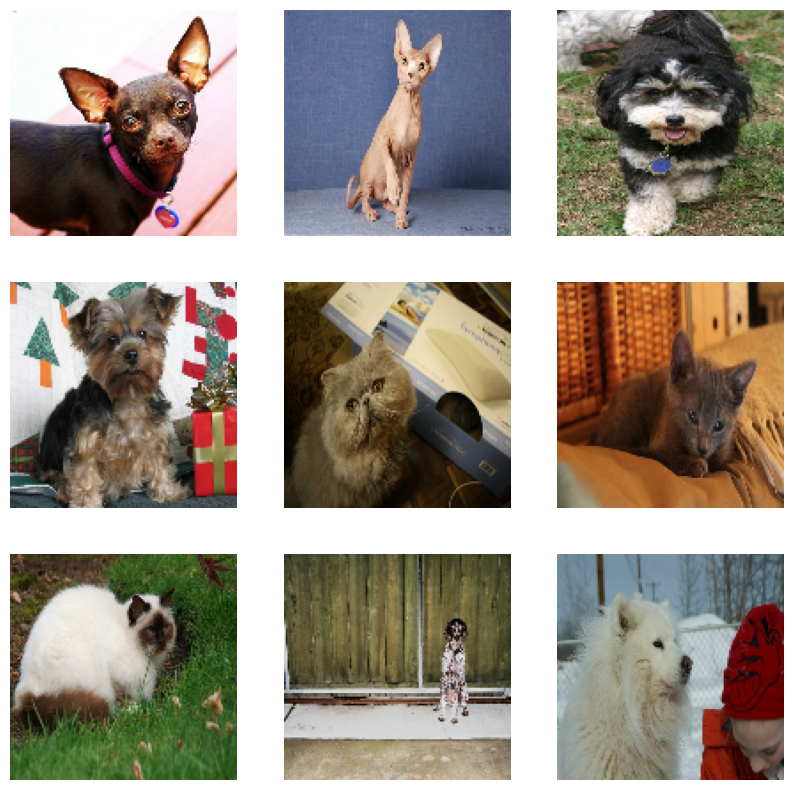

In [8]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Configuración de tamaño de las imágenes
img_height = 128
img_width = 128
batch_size = 32

# Directorio de los datos descargados
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

# Cargar datasets de imágenes para entrenamiento y validación
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Normalizar imágenes (convertir de 0-255 a 0-1)
def normalize_image(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize_image)
val_ds = val_ds.map(normalize_image)

# Asegurar que el dataset esté en un formato eficiente para el entrenamiento
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Visualizar algunas imágenes del dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')
plt.show()


In [43]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Definir rutas
base_dir = '/content/dataset'  # El directorio donde están los datos descargados
train_dir = os.path.join(base_dir, 'train')  # El directorio de imágenes de entrenamiento
val_dir = os.path.join(base_dir, 'val')  # El directorio de imágenes de validación
output_dir = '/content/reorganized_dataset'  # Directorio donde reorganizaremos las imágenes

# Asegúrate de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)

# Lista de las clases
classes = ['cat', 'dog']

# Crear las subcarpetas para cada clase dentro de 'train' y 'val'
for class_name in classes:
    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', class_name), exist_ok=True)

# Reorganizar las imágenes
image_paths = []
labels = []

# Recorremos las imágenes de cada clase en el directorio 'train'
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image_paths.append(img_path)
        labels.append(class_name)

# Dividir los datos en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.2, stratify=labels)

# Función para mover las imágenes a los directorios correspondientes
def move_images(paths, labels, split_type):
    for path, label in zip(paths, labels):
        # Obtener el nombre del archivo
        img_name = os.path.basename(path)

        # Determinar el nuevo destino
        dest_dir = os.path.join(output_dir, split_type, label, img_name)

        # Mover la imagen
        shutil.copy(path, dest_dir)

# Mover las imágenes de entrenamiento y validación
move_images(train_paths, train_labels, 'train')
move_images(val_paths, val_labels, 'val')

# Crear los archivos CSV (train.csv y val.csv)
def create_csv(file_paths, labels, filename):
    data = {'image': file_paths, 'label': labels}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

# Crear CSV para los conjuntos de entrenamiento y validación
train_csv_path = os.path.join(output_dir, 'train.csv')
val_csv_path = os.path.join(output_dir, 'val.csv')

create_csv(train_paths, train_labels, train_csv_path)
create_csv(val_paths, val_labels, val_csv_path)

print("Dataset reorganizado con éxito.")
print(f"Archivos CSV creados: {train_csv_path}, {val_csv_path}")


Dataset reorganizado con éxito.
Archivos CSV creados: /content/reorganized_dataset/train.csv, /content/reorganized_dataset/val.csv


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Definir las rutas a los directorios de entrenamiento y validación
train_dir = '/content/reorganized_dataset/train'
val_dir = '/content/reorganized_dataset/val'

# Crear un generador de imágenes para cargar el dataset y normalizarlas
img_height = 128
img_width = 128
batch_size = 32

# Usamos ImageDataGenerator para cargar y procesar las imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizamos las imágenes a [0, 1]
    validation_split=0.2  # Establecemos un 20% de las imágenes para validación
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización para validación

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Usamos clasificación binaria: gato o perro
    subset='training'  # Este es el conjunto de entrenamiento
)

# Generador para el conjunto de validación
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Usamos clasificación binaria: gato o perro
    subset='validation'  # Este es el conjunto de validación
)



Found 220 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [45]:
from tensorflow.keras import layers, models

def build_generator(z_dim):
    model = models.Sequential()

    model.add(layers.Dense(256, input_dim=z_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))

    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))

    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))

    model.add(layers.Dense(img_height * img_width * 3, activation='tanh'))
    model.add(layers.Reshape((img_height, img_width, 3)))

    return model

# Definir la dimensión del vector de ruido
z_dim = 100  # Este es el tamaño del vector de ruido que pasaremos al generador
generator = build_generator(z_dim)
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_50 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_51 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_52 (LeakyReLU)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 49152)               │      50,380,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,070,720 (194.82 MB)

 Trainable params: 51,067,136 (194.81 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [46]:
def build_discriminator():
    model = models.Sequential()

    model.add(layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(img_height, img_width, 3)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Salida con una sola neurona para clasificación real/falsa

    return model

discriminator = build_discriminator()
discriminator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_53 (LeakyReLU)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_54 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_55 (LeakyReLU)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │          65,537 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 436,353 (1.66 MB)

 Trainable params: 436,353 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # El discriminador no se entrena cuando entrenamos el GAN

    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)

    return model

gan = build_gan(generator, discriminator)
gan.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_21 (Sequential)           │ (None, 128, 128, 3)         │      51,070,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_22 (Sequential)           │ (None, 1)                   │         436,353 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,507,073 (196.48 MB)

 Trainable params: 51,067,136 (194.81 MB)

 Non-trainable params: 439,937 (1.68 MB)

In [48]:
from tensorflow.keras.optimizers import Adam

# Definir la dimensión del vector de ruido
z_dim = 100

# Construir el generador, el discriminador y la GAN
generator = build_generator(z_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compilar el discriminador
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Compilar la GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


In [41]:
import numpy as np

def train_gan(epochs, batch_size, z_dim):
    half_batch = batch_size // 2  # Usamos la mitad del tamaño de batch para entrenamiento del discriminador

    for epoch in range(epochs):
        for _ in range(train_generator.samples // batch_size):
            # 1. Entrenar el discriminador
            # Seleccionar una muestra aleatoria de imágenes reales
            real_images, real_labels = next(train_generator)
            real_labels = np.ones((half_batch, 1))  # Las imágenes reales tienen etiqueta 1

            # Generar un lote de imágenes falsas
            noise = np.random.normal(0, 1, (half_batch, z_dim))
            fake_images = generator.predict(noise)
            fake_labels = np.zeros((half_batch, 1))  # Las imágenes falsas tienen etiqueta 0

            # Entrenar el discriminador
            d_loss_real = discriminator.train_on_batch(real_images[:half_batch], real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # 2. Entrenar el generador
            noise = np.random.normal(0, 1, (batch_size, z_dim))
            valid_labels = np.ones((batch_size, 1))  # El generador quiere que las imágenes sean clasificadas como reales

            # Entrenar la GAN
            g_loss = gan.train_on_batch(noise, valid_labels)

        print(f"{epoch+1}/{epochs} | D Loss: {d_loss[0]} | G Loss: {g_loss}")

# Entrenar la GAN
epochs = 10
batch_size = 32
train_gan(epochs, batch_size, z_dim)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/10 | D Loss: 0.684889554977417 | G Loss: [array(0.68642485, dtype=float32), array(0.68642485, dtype=float32), array(0.4375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/10 | D Loss: 0.6998077630996704 | G Loss: [array(0.7022459, dtype=float32), array(0.7022459, dtype=float32), array(0.40364584, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/10 | D Loss: 0.7260257005691528 | G Loss: [array(0.7291396, dtype

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


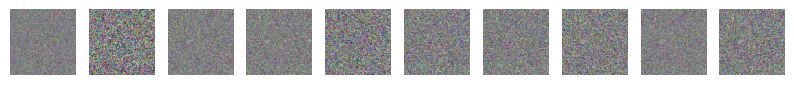

In [42]:
import matplotlib.pyplot as plt

# Generar nuevas imágenes
noise = np.random.normal(0, 1, (20, z_dim))  # Generamos 10 imágenes
generated_images = generator.predict(noise)

# Visualizar las imágenes generadas
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow((generated_images[i] + 1) / 2)  # Ajustamos los valores para que estén entre 0 y 1
    axes[i].axis('off')
plt.show()